### Heart disease prediction

The project is about pridicting corinary heart disease by using SVM,Logistic,KNN 

And to know which is the best approach


A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa.
There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their occurrence of CHD. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal.


Attributes
1.	Systolic blood pressure (Sbp)
2.	Cumulative tobacco consumption (kg)
3.	Low density lipoprotein (LDL-cholesterol)
4.	Adiposity
5.	Family history of heart disease (Present/Absent)
6.	Type-A behavior
7.	Obesity
8.	Current alcohol consumption
9.	Age during onset of condition
10.	CHD response


In [2]:
#  importing primary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Read the dataset
CHD = pd.read_csv('E:/ML Algorithm/Datasets/Heart_disease.csv')

In [4]:
CHD.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [5]:
# setting up the columbn
column = ['sbp','tabacco','IdI','adiposity','famhist','type','obesity','alcohol','age','chd']

In [6]:
CHD.columns=column

In [7]:
CHD.head()

,sbp,tabacco,IdI,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [8]:
CHD.tail()

,sbp,tabacco,IdI,adiposity,famhist,type,obesity,alcohol,age,chd
457,214,0.4,5.98,31.72,2,64,28.45,0.00,58,1
458,182,4.2,4.41,32.10,2,52,28.61,18.72,52,2
459,108,3.0,1.59,15.23,2,40,20.09,26.64,55,1
460,118,5.4,11.61,30.79,2,64,27.35,23.97,40,1
461,132,0.0,4.82,33.41,1,62,14.70,0.00,46,2


In [12]:
CHD.shape

(462, 10)

In [10]:
CHD.describe()

,sbp,tabacco,IdI,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


In [9]:
CHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tabacco    462 non-null    float64
 2   IdI        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   type       462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


In [13]:
CHD.isnull().sum()

sbp          0
tabacco      0
IdI          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

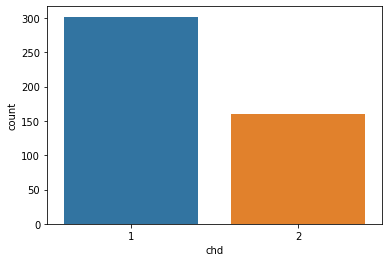

In [14]:
sb.countplot(x="chd", data=CHD)
plt.show()

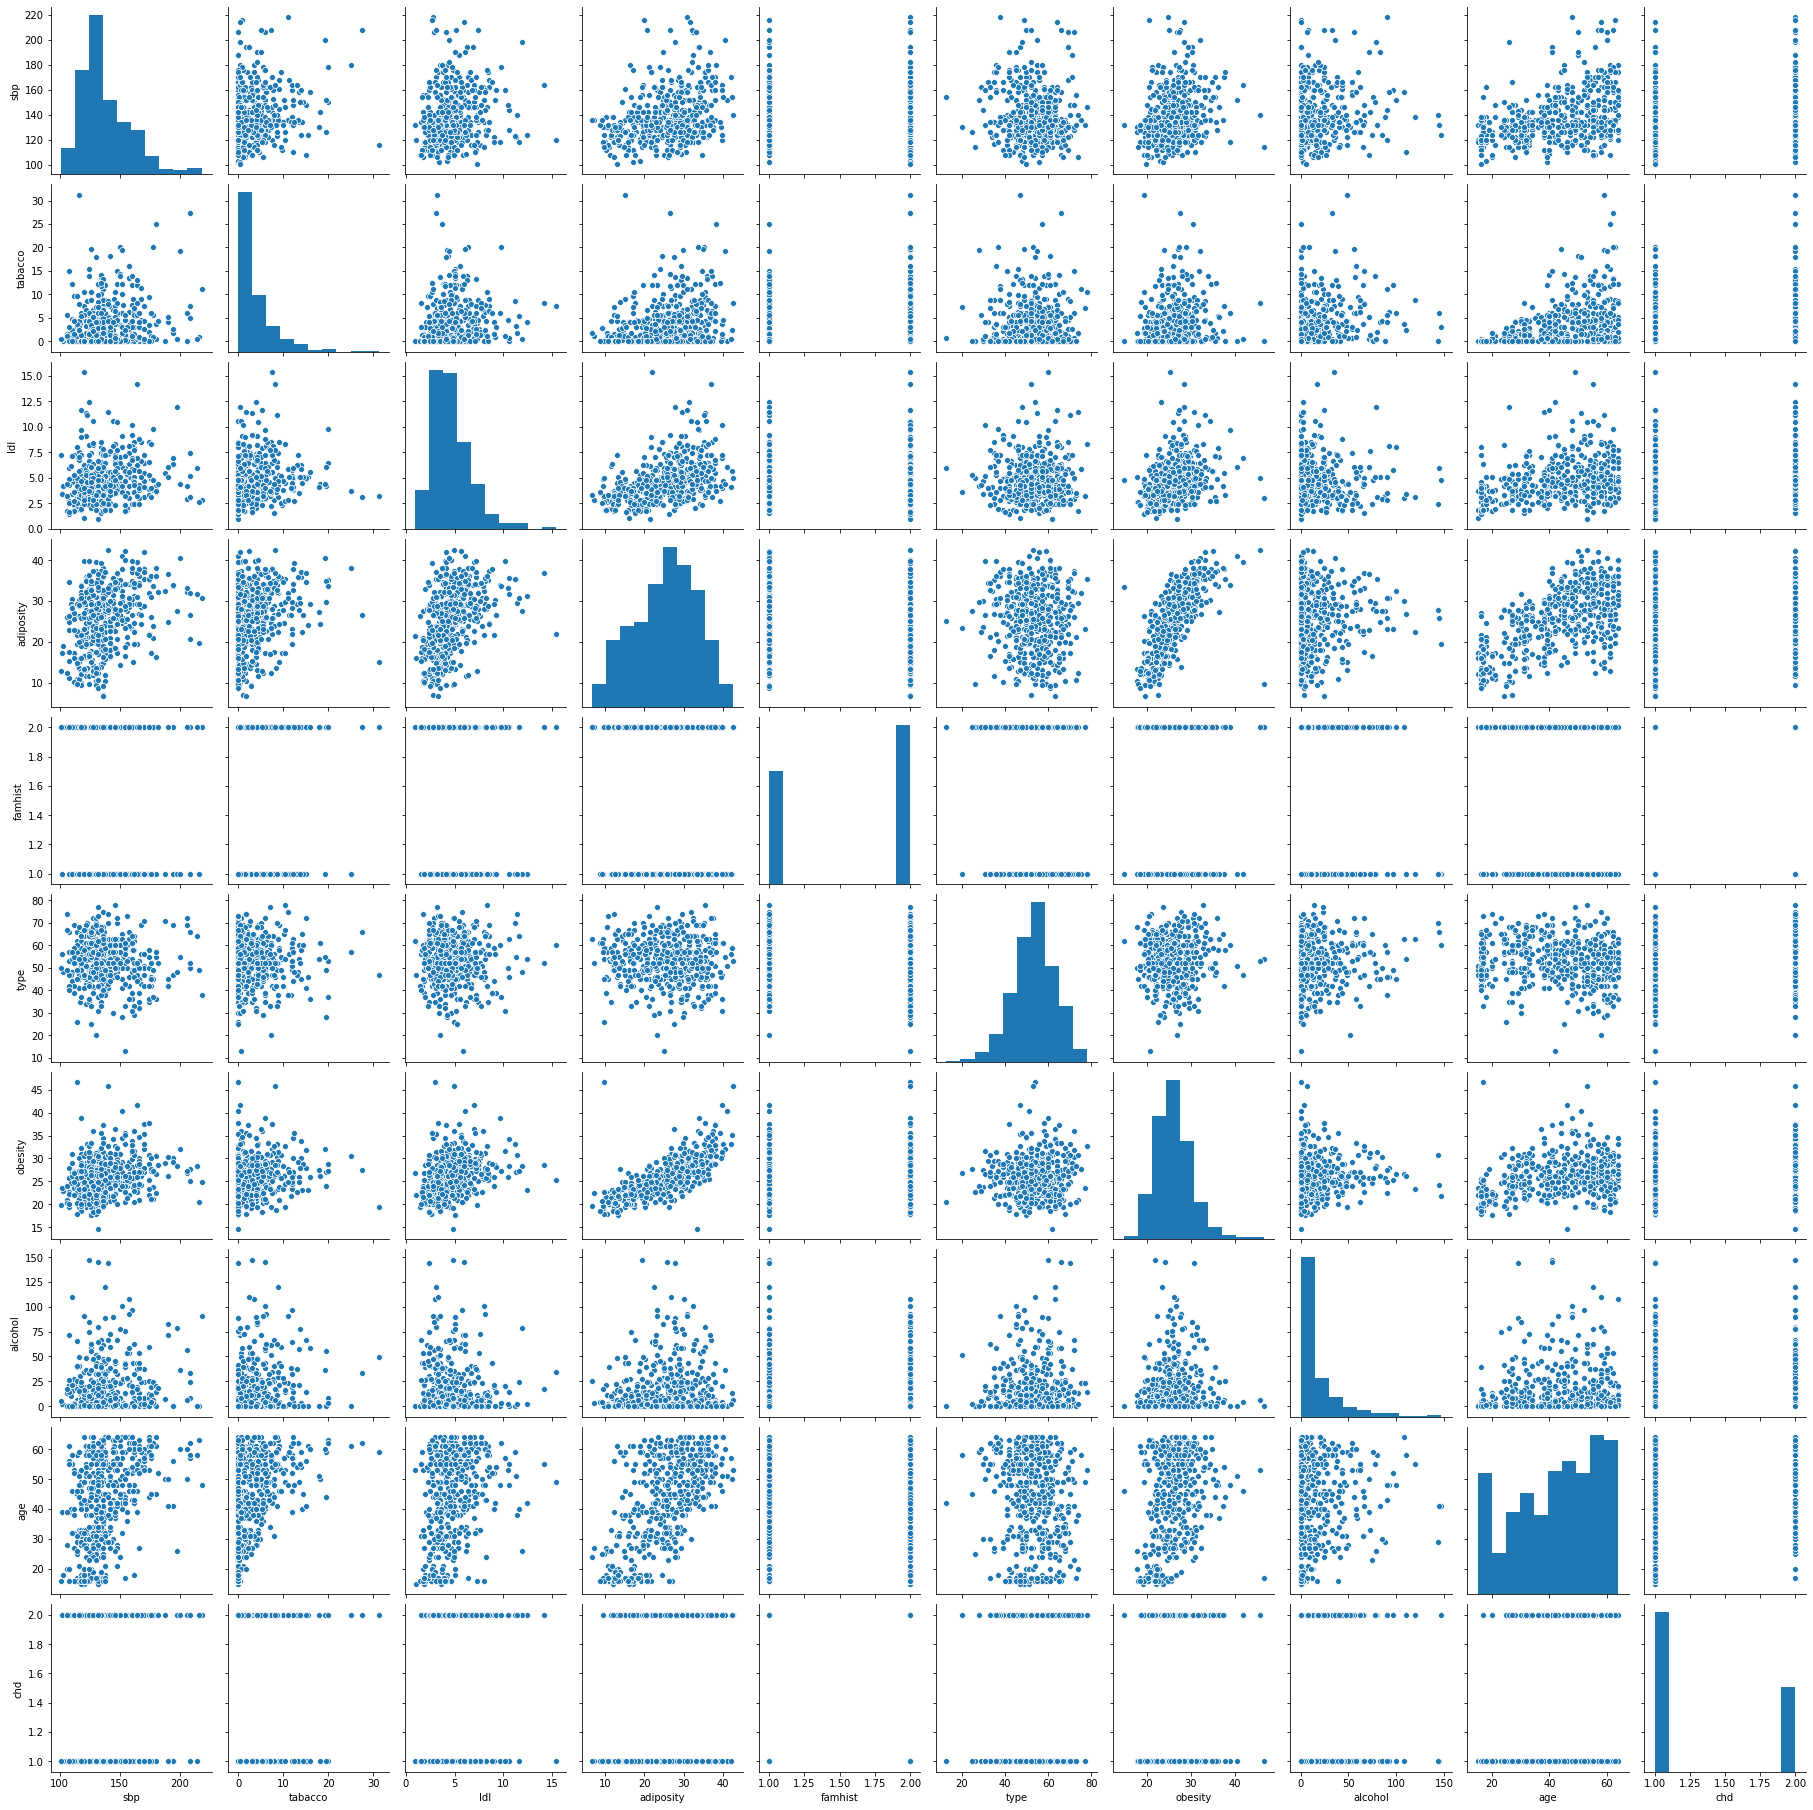

In [15]:
sb.pairplot(CHD)

In [16]:
X = CHD.drop('chd', axis=1)
y = CHD['chd']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20)

In [18]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred= svclassifier.predict(X_test)

In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[52 14]
 [15 12]]
              precision    recall  f1-score   support

           1       0.78      0.79      0.78        66
           2       0.46      0.44      0.45        27

    accuracy                           0.69        93
   macro avg       0.62      0.62      0.62        93
weighted avg       0.68      0.69      0.69        93



In [21]:
svclassifier.score(X,y)

0.7251082251082251

In [22]:
# logistic Regression Apporoach
from sklearn.linear_model import LogisticRegression

In [25]:
X = CHD.drop('chd', axis=1)
y = CHD['chd']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20)

In [27]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)


C:\Users\Rajesh Mohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
prediction=log_reg.predict(X_test)

In [29]:
print(prediction)

[1 1 1 1 2 1 1 1 1 1 2 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 2 2 2 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1]


In [30]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[52 12]
 [16 13]]
              precision    recall  f1-score   support

           1       0.76      0.81      0.79        64
           2       0.52      0.45      0.48        29

    accuracy                           0.70        93
   macro avg       0.64      0.63      0.63        93
weighted avg       0.69      0.70      0.69        93



In [31]:
log_reg.score(X,y)

0.7229437229437229